In [1]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_test

Using TensorFlow backend.
C:\Users\trytr\PycharmProjects\ML Demo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\trytr\PycharmProjects\ML Demo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\trytr\PycharmProjects\ML Demo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\trytr\PycharmP

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


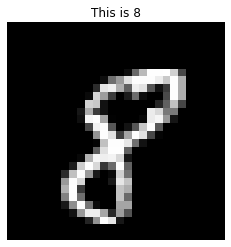

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 59999)
plt.title("This is {}".format(y_train[idx]))
plt.axis("off")
plt.imshow(x_train[idx], cmap="gray")

In [4]:
# keras: 建立模型兩種方式 Sequential(層疊式) Model(?)
from keras.models import Sequential
# Dense: 全連接層
from keras.layers import Dense
model = Sequential()
# 784 * 128(全連接) + 128(bias) = 100480
model.add(Dense(128, activation="relu", input_dim=784))
# 128 * 10(全連接) + 10(bias) = 1290
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# loss: 跟正確答案的距離
# oprimizer: 梯度下降的優化器
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [6]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# batch_size: 看多少筆資料再平均做一次調整, 100~200(建議), 5~20(大圖片)
# epoch: 整份訓練資料到底要看過幾遍(控制模型什麼時候訓練該訓練完成)
# validation_split:(train_test_split)切分多少測試資料出來
# verbose: (Log要有多少程度) 1(預設):會有進度條 2: 必要資訊  0:安靜
# 以 val_loss 判斷模型是否過度擬合
model.fit(x_train_norm, y_train_cat,
          batch_size=200,
          epochs=10,
          validation_split=0.1,
          verbose=2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.4387 - accuracy: 0.8795 - val_loss: 0.1957 - val_accuracy: 0.9472
Epoch 2/10
 - 1s - loss: 0.2043 - accuracy: 0.9430 - val_loss: 0.1407 - val_accuracy: 0.9637
Epoch 3/10
 - 1s - loss: 0.1482 - accuracy: 0.9580 - val_loss: 0.1193 - val_accuracy: 0.9687
Epoch 4/10
 - 1s - loss: 0.1177 - accuracy: 0.9668 - val_loss: 0.0997 - val_accuracy: 0.9720
Epoch 5/10
 - 1s - loss: 0.0957 - accuracy: 0.9729 - val_loss: 0.0962 - val_accuracy: 0.9755
Epoch 6/10
 - 1s - loss: 0.0824 - accuracy: 0.9770 - val_loss: 0.0850 - val_accuracy: 0.9753
Epoch 7/10
 - 1s - loss: 0.0686 - accuracy: 0.9805 - val_loss: 0.0812 - val_accuracy: 0.9773
Epoch 8/10
 - 1s - loss: 0.0596 - accuracy: 0.9831 - val_loss: 0.0794 - val_accuracy: 0.9780
Epoch 9/10
 - 1s - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 10/10
 - 1s - loss: 0.0444 - accuracy: 0.9880 - val_loss: 0.0751 - val_accuracy: 0.9790


In [8]:
# 先做個Loss, accuracy
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 17us/step


[0.07821364525547252, 0.9771000146865845]

In [9]:
# confusion matrix
# sklearn: predict_proba, predict
# keras: predict, predict_classes
# 如果你要對list裡面所有東西做轉換: list(map(lambda x:x**2, [1, 2, 3]))
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(i) for i in range(10)]
c = ["{}(預測)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)
convert = []
for row in mat:
    r = np.array(row) / sum(row) * 100
    r = list(map(lambda x:"{}%".format(round(x, 2)), r))
    convert.append(r)
pd.DataFrame(convert,
             index=i,
             columns=c)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),98.47%,0.0%,0.2%,0.1%,0.2%,0.1%,0.51%,0.1%,0.1%,0.2%
1(正確),0.0%,99.21%,0.26%,0.0%,0.0%,0.0%,0.18%,0.0%,0.35%,0.0%
2(正確),0.29%,0.19%,98.06%,0.0%,0.19%,0.0%,0.29%,0.39%,0.58%,0.0%
3(正確),0.0%,0.0%,0.89%,97.82%,0.1%,0.1%,0.0%,0.3%,0.5%,0.3%
4(正確),0.1%,0.0%,0.41%,0.1%,98.07%,0.0%,0.2%,0.2%,0.2%,0.71%
5(正確),0.22%,0.0%,0.0%,0.78%,0.11%,97.65%,0.78%,0.11%,0.22%,0.11%
6(正確),0.52%,0.31%,0.31%,0.1%,0.52%,0.63%,97.29%,0.0%,0.31%,0.0%
7(正確),0.1%,0.49%,1.26%,0.29%,0.19%,0.0%,0.0%,97.28%,0.1%,0.29%
8(正確),0.31%,0.1%,0.41%,0.92%,0.41%,0.41%,0.21%,0.51%,96.51%,0.21%
9(正確),0.3%,0.5%,0.0%,0.59%,1.09%,0.1%,0.0%,0.59%,0.3%,96.53%


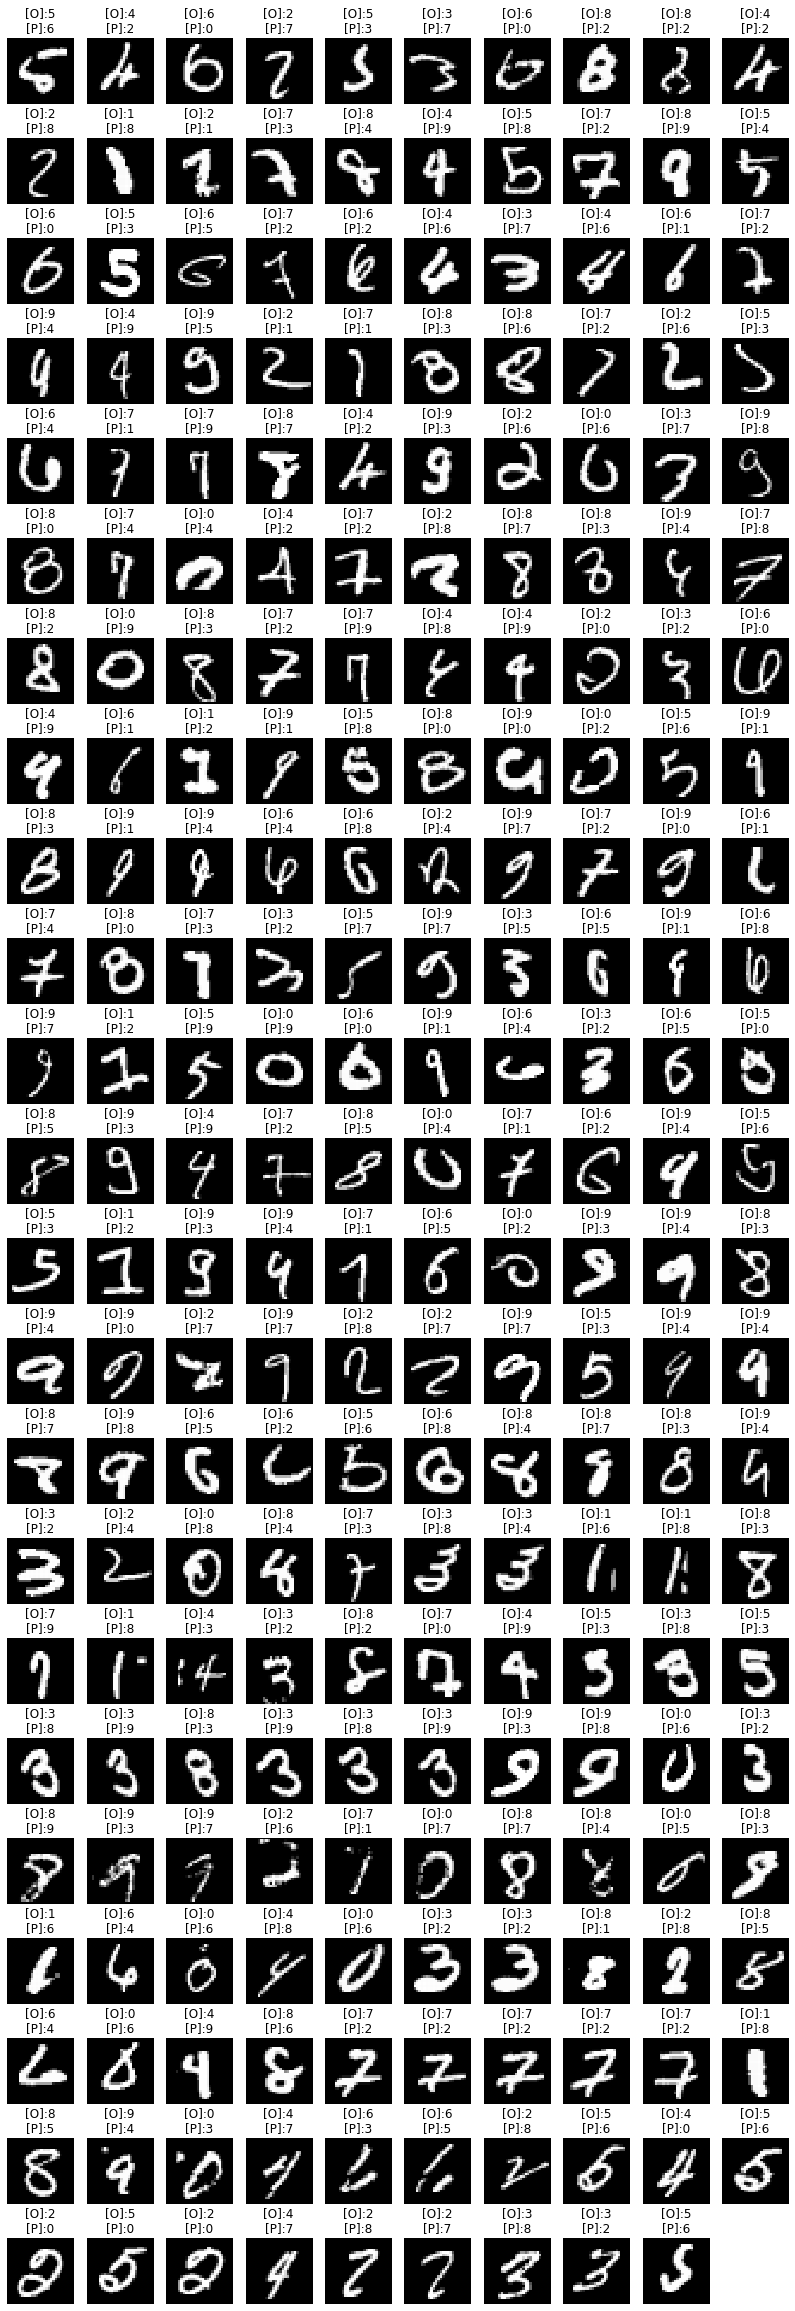

In [10]:
# np: !=來比較每個位置的相等
# nonzero: 找到所有不為0的位置
# [類似list] -> 把所有東西一次拿給你
idx = np.nonzero(pre != y_test)[0]

false_label = y_test[idx]
false_pre = pre[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

false_collection = zip(false_label, false_pre, false_img)
# 得到每一個: (index, (false_label, pre, img))
for i, (l, p, img) in enumerate(false_collection):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(l, p)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

請輸入檔案位址:test.png
機率最高的: 9
是 9 的機率: 0.6140822
是 7 的機率: 0.23642474
是 8 的機率: 0.06681846
是 3 的機率: 0.03536012
是 4 的機率: 0.017518057
是 5 的機率: 0.011894344
是 2 的機率: 0.010809464
是 0 的機率: 0.005874547
是 1 的機率: 0.0006510939
是 6 的機率: 0.00056696095


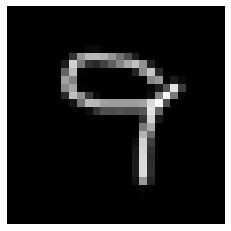

In [11]:
# sorted([("Amy", 5), ("Carol", 4), ("Bob", 3)],
#       key=lambda t:t[1])
from keras.preprocessing.image import load_img
fp = input("請輸入檔案位址:")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(-1, 784) / 255
ans = model.predict_classes(img_np)[0]
print("機率最高的:", ans)
pre = model.predict(img_np)[0]
z = zip(list(range(10)), pre)
for i, p in sorted(z, key=lambda x:x[1], reverse=True):
    print("是", i, "的機率:", p)
plt.axis("off")
plt.imshow(img, cmap="gray")

In [12]:
# 如果你想看: https://support.hdfgroup.org/products/java/release/download.html
model.save("mlp.h5")

In [14]:
# 讀取: predict直接使用
# fit不需要compile
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 21us/step


[0.07821364525547252, 0.9771000146865845]